In [321]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import h5py
 
    
%matplotlib inline

In [396]:
def plot_dual(data, num, ylab, title):
    data = data[:, :num]

    d1 = data[0]
    d2 = data[1]
    
    d1m = []
    d2m = []
    xs = []
    sz = 50
    for i in range(1+(len(d1) / sz)):
        d1m.append(np.nanmean(d1[sz*i:sz+sz*i]))
        d2m.append(np.nanmean(d2[sz*i:sz+sz*i]))
        xs.append(sz*i)

    plt.plot(d1, linestyle="", marker=".", label="P0")
    plt.plot(d2, linestyle="", marker=".", label="P1")
    plt.plot(xs, d1m,linewidth=2, color="black")
    plt.plot(xs, d2m,linewidth=2, color="blue")
    plt.plot([0]*len(d2), linestyle=":", color="black")

    plt.title(title)
    plt.legend()
    plt.xlabel("Episode")
    plt.ylabel(ylab)
    plt.show()
    
def plot_quad(data, num, ylab, title):
    data = data[:, :num]

    d1 = data[0]
    d2 = data[1]
    d3 = data[2]
    d4 = data[3]
#     print d1 + d2
#     print d3 + d4
    
    d1m = []
    d2m = []
    d3m = []
    d4m = []
    xs = []
    sz = 50
    for i in range(1+(len(d1) / sz)):
        d1m.append(np.nanmean(d1[sz*i:sz+sz*i]))
        d2m.append(np.nanmean(d2[sz*i:sz+sz*i]))
        d3m.append(np.nanmean(d3[sz*i:sz+sz*i]))
        d4m.append(np.nanmean(d4[sz*i:sz+sz*i]))
        xs.append(sz*i)

    plt.plot(d1, linestyle="", marker=".", label="P0, O0")
    plt.plot(d2, linestyle="", marker=".", label="P0, O1")
    plt.plot(xs, d1m,linewidth=2, color="black")
    plt.plot(xs, d2m,linewidth=2, color="blue")
    plt.plot(d3, linestyle="", marker=".", label="P1, O0")
    plt.plot(d4, linestyle="", marker=".", label="P1, O1")
    plt.plot(xs, d3m,linewidth=2, color="red")
    plt.plot(xs, d4m,linewidth=2, color="green")
    plt.plot([0]*len(d2), linestyle=":", color="black")

    plt.title(title)
    plt.legend()
    plt.xlabel("Episode")
    plt.ylabel(ylab)
    plt.show()

In [409]:
f = h5py.File("logging/logs28.txt", 'r', libver='latest', swmr=True)

try:
    option_counts = f['statistics']["ep_options"]
    OPTIONS = True
except:
    OPTIONS = False
    
move_q =  f['statistics']["ep_move_q"][:]
kick_q =  f['statistics']["ep_kick_q"][:]
turn_q = f['statistics']["ep_turn_q"][:]
tackle_q = f['statistics']["ep_tackle_q"][:]
good_q = f['statistics']["ep_good_q"][:]
bad_q = f['statistics']["ep_bad_q"][:]

plotfunc = plot_dual

r=  f['statistics']["ep_reward"][:]
closs = f['statistics']["ep_closs"][:]
aloss= f['statistics']["ep_aloss"][:]
numdone = f['statistics']["ep_numdone"][0]

('NUMDONE', 499)


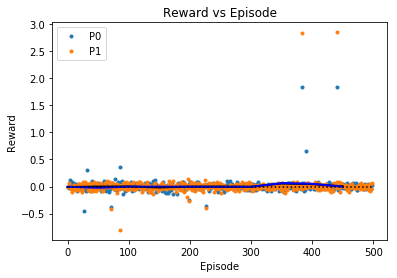

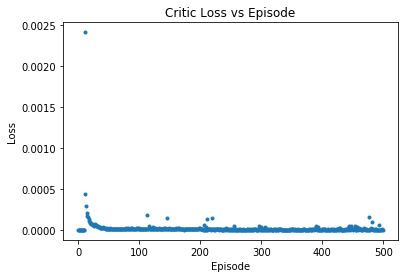

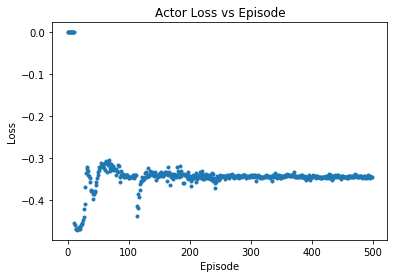

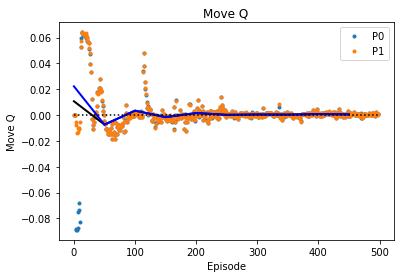

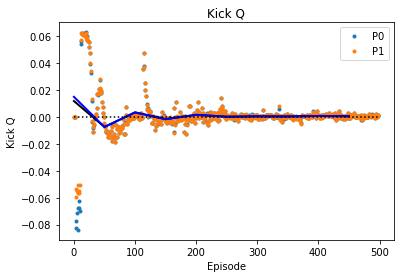

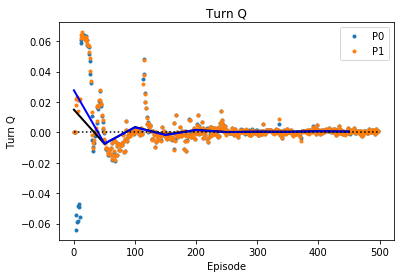

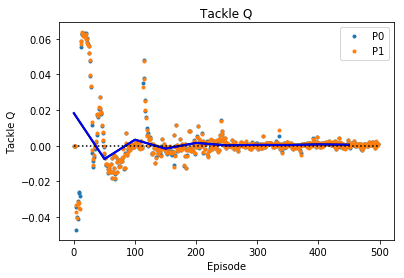

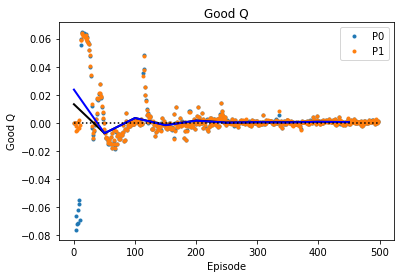

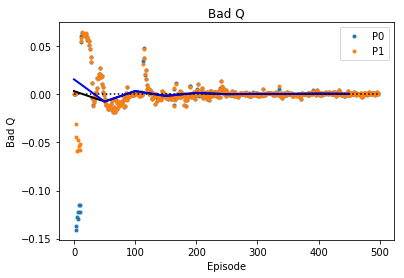

In [410]:
print("NUMDONE", numdone)
# Plot Reward
im = plot_dual(r, numdone, "Reward", "Reward vs Episode")

# Plot Critic Loss
plt.plot(closs[0][:numdone+1], linestyle="", marker=".")
plt.title("Critic Loss vs Episode")
plt.xlabel("Episode")
plt.ylabel("Loss")
plt.show()

# Plot Actor Loss
plt.plot(aloss[0][:numdone+1], linestyle="", marker=".")
plt.title("Actor Loss vs Episode")
plt.xlabel("Episode")
plt.ylabel("Loss")
plt.show()

# Plot Q value for different actions
plotfunc(move_q, numdone, "Move Q", "Move Q")
plotfunc(kick_q, numdone, "Kick Q", "Kick Q")
plotfunc(turn_q, numdone, "Turn Q", "Turn Q")
plotfunc(tackle_q, numdone, "Tackle Q", "Tackle Q")
plotfunc(good_q, numdone, "Good Q", "Good Q")
plotfunc(bad_q, numdone, "Bad Q", "Bad Q")

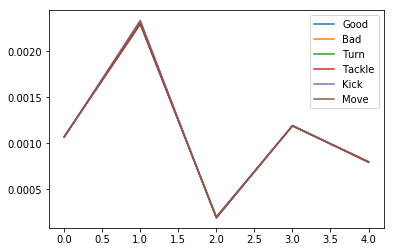

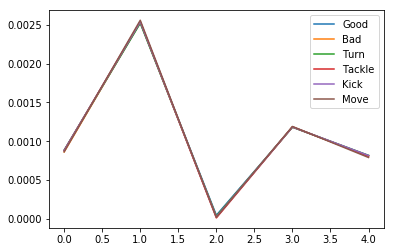

In [411]:
# Show Relative Q values for different aciton in last 5 episodes
skip = numdone - 5
for p in [0,1]:
    plt.plot(good_q[p, skip: numdone], linestyle="-", marker="", label = "Good")
    plt.plot(bad_q[p, skip: numdone], linestyle="-", marker="", label = "Bad")
    plt.plot(turn_q[p, skip: numdone], linestyle="-", marker="", label = "Turn")
    plt.plot(tackle_q[p, skip: numdone], linestyle="-", marker="", label = "Tackle")
    plt.plot(kick_q[p, skip: numdone], linestyle="-", marker="", label = "Kick")
    plt.plot(move_q[p, skip:numdone], linestyle="-", marker="", label = "Move")
#     plt.plot([0]*numdone, linestyle=":")

    plt.legend()
    plt.plot()
    plt.show()

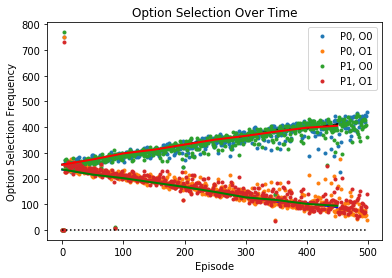

In [412]:
# If options, plot which option had higher weight
if OPTIONS:
    plot_quad(option_counts, numdone, "Option Selection Frequency", "Option Selection Over Time")